LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN"

LGMVIP August-23

AUTHOR - NIKHIL ESHWAR

More Advanced Level Task

TASK-10- : ML Facial recognition to detect mood and suggest songs accordingly

Dataset link : https://www.kaggle.com/msambare/fer2013

Importing Necessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import os
import random
import zipfile
from skimage.io import imread
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D,MaxPooling2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from IPython.display import Audio
%matplotlib inline

Unzipping the Dataset

In [ ]:
def unzip_file(zip_file_path, extract_dir):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
zip_file_path = '/content/archive (6).zip'
extract_dir = ''

unzip_file(zip_file_path, extract_dir)

Displaying Some Images

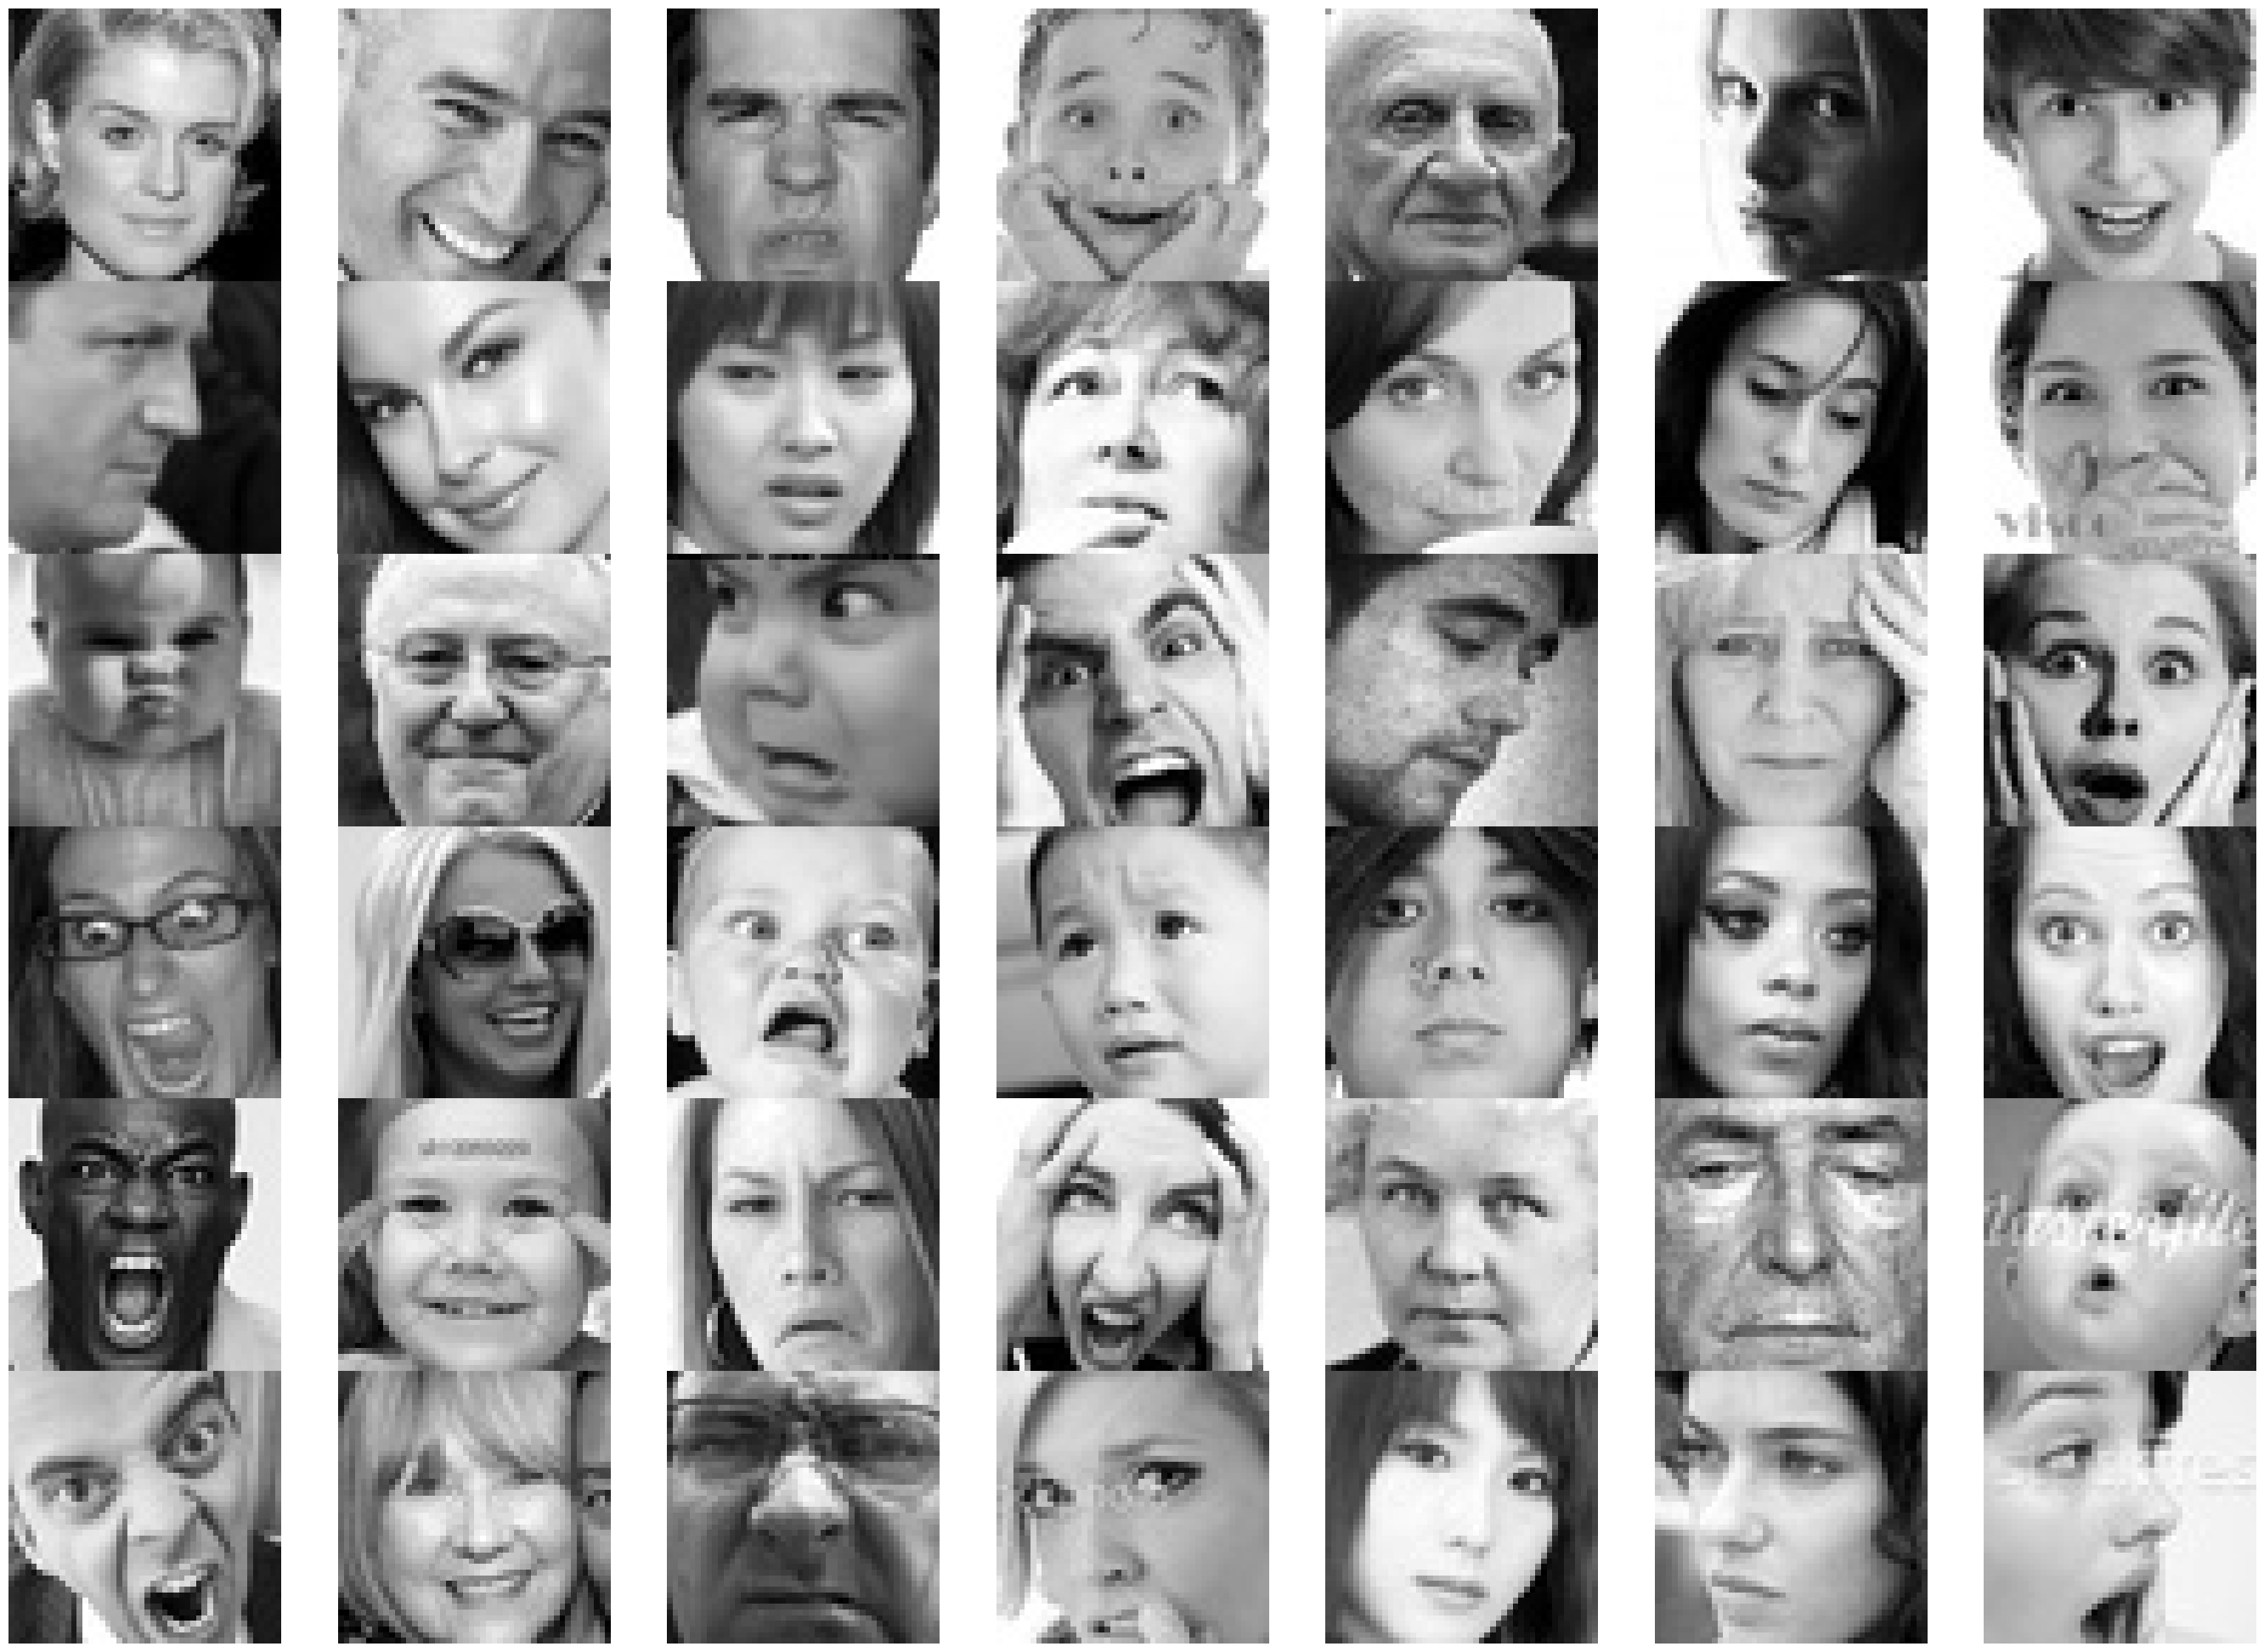

In [ ]:
train_dir = "train/"
test_dir  ='test/'
total_labels = len(os.listdir(train_dir))

fig, ax = plt.subplots(6, total_labels, figsize=(35, 25))
for x in range(6):
    for y, v in enumerate(os.listdir(train_dir)):
        image_path = os.path.join(train_dir, v, os.listdir(os.path.join(train_dir, v))[x])
        image = imread(image_path)
        ax[x, y].imshow(image, cmap='gray')
        ax[x, y].axis('off')

plt.subplots_adjust(wspace=0, hspace=0)

In [ ]:
print('Number of Images in Training Set: ')
for exp in os.listdir(train_dir):
    print(str(len(os.listdir(train_dir+'/'+exp)))+" "+exp+" "+"images")

Number of Images in Training Set: 
3995 angry images
7215 happy images
436 disgust images
4097 fear images
4965 neutral images
4830 sad images
3171 surprise images


In [ ]:
print('Number of Images in Testing Set: ')
for exp in os.listdir(test_dir):
    print(str(len(os.listdir(test_dir+'/'+exp)))+" "+exp +" "+"images")

Number of Images in Testing Set: 
958 angry images
1774 happy images
111 disgust images
1024 fear images
1233 neutral images
1247 sad images
831 surprise images


In [ ]:
img_size = 48

In [ ]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]

    plt.figure(figsize=(10, 10))

    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()
        plt.imshow(img, cmap='gray')

**Sample Images from each category**

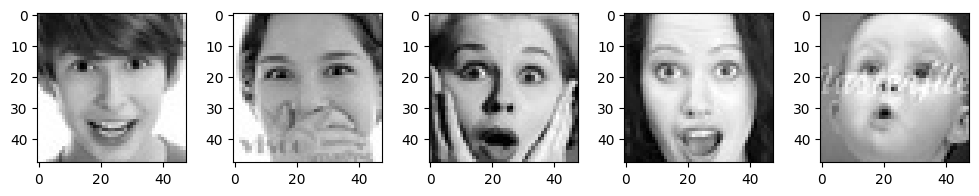

In [ ]:
plot_images(train_dir+"/"+"surprise")

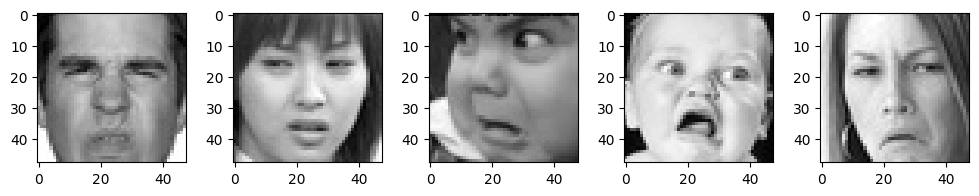

In [ ]:
plot_images(train_dir+"/"+"disgust")

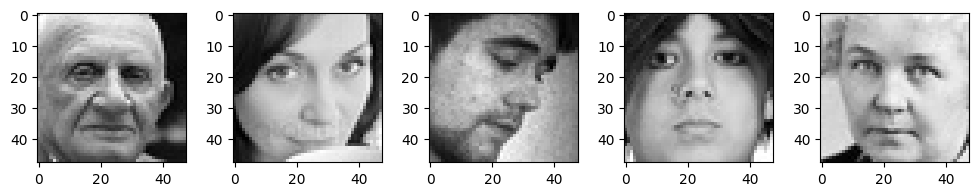

In [ ]:
plot_images(train_dir+"/"+"neutral")

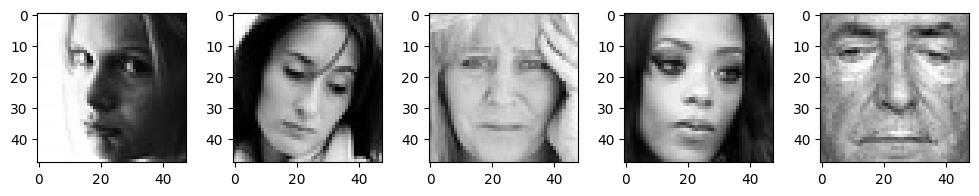

In [ ]:
plot_images(train_dir+"/"+"sad")

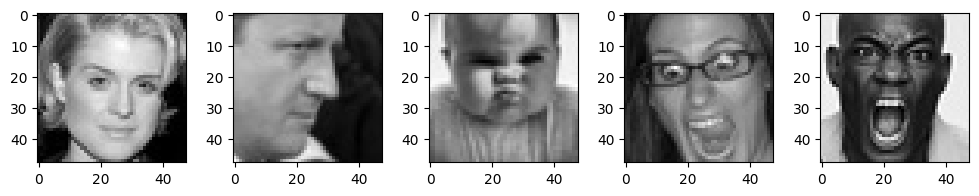

In [ ]:
plot_images(train_dir+"/"+"angry")

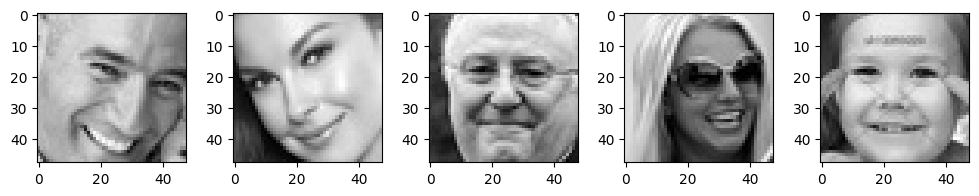

In [ ]:
plot_images(train_dir+"/"+"happy")

In [ ]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,height_shift_range = 0.1,horizontal_flip = True,rescale = 1./255,validation_split = 0.2)
validation_datagen = ImageDataGenerator(rescale = 1./255,validation_split = 0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


Model Creation

In [ ]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
epochs = 60
batch_size = 64

Model Summary

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_2 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

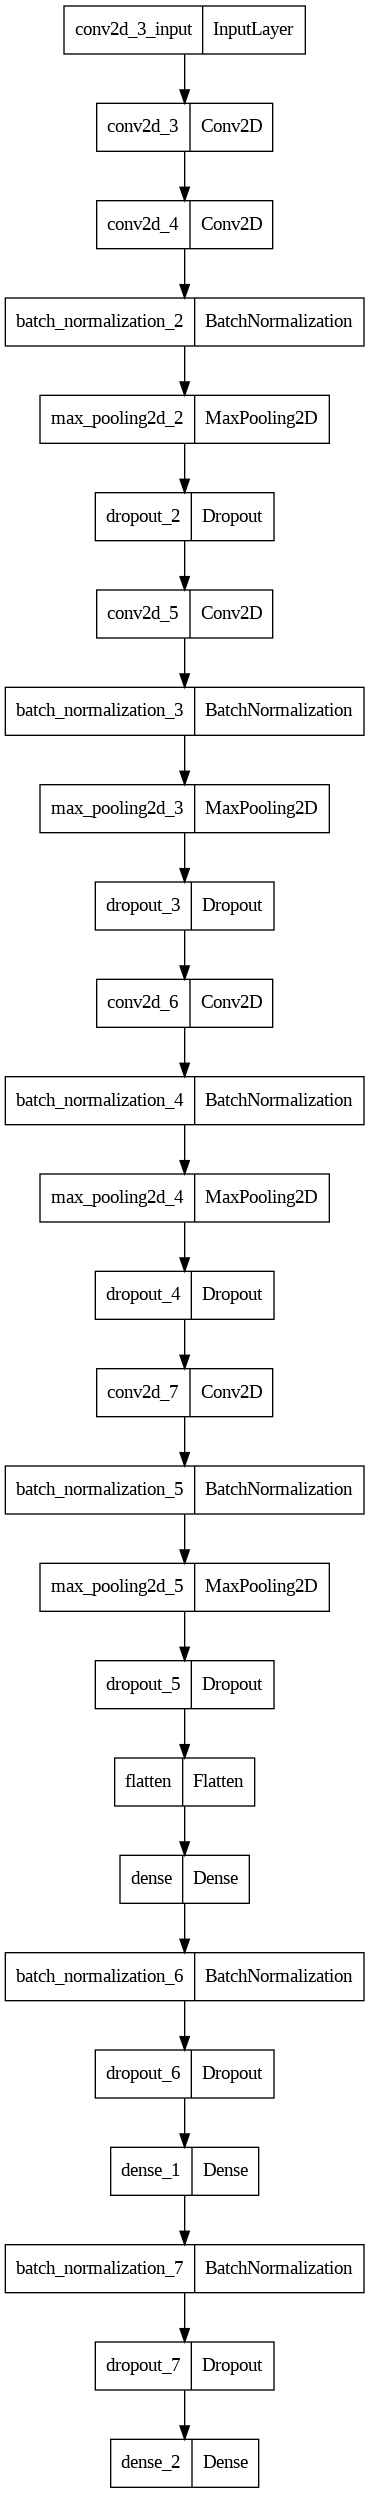

In [ ]:
plot_model(model)

Model Building

In [ ]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/60
359/359 [==============================] - 45s 73ms/step - loss: 5.2274 - accuracy: 0.2307 - val_loss: 3.2075 - val_accuracy: 0.2479
Epoch 2/60
359/359 [==============================] - 25s 70ms/step - loss: 2.2991 - accuracy: 0.3240 - val_loss: 2.7813 - val_accuracy: 0.1732
Epoch 3/60
359/359 [==============================] - 26s 74ms/step - loss: 2.3232 - accuracy: 0.4050 - val_loss: 2.8922 - val_accuracy: 0.2703
Epoch 4/60
359/359 [==============================] - 27s 76ms/step - loss: 2.3001 - accuracy: 0.4486 - val_loss: 2.3123 - val_accuracy: 0.4553
Epoch 5/60
359/359 [==============================] - 24s 67ms/step - loss: 2.2101 - accuracy: 0.4772 - val_loss: 2.2878 - val_accuracy: 0.4399
Epoch 6/60
359/359 [==============================] - 25s 70ms/step - loss: 2.1453 - accuracy: 0.4917 - val_loss: 2.2825 - val_accuracy: 0.5209
Epoch 7/60
359/359 [==============================] - 24s 67ms/step - loss: 2.1721 - accuracy: 0.5003 - val_loss: 2.3408 - val_accuracy:

Text(0.5, 0.98, 'Training and validation')

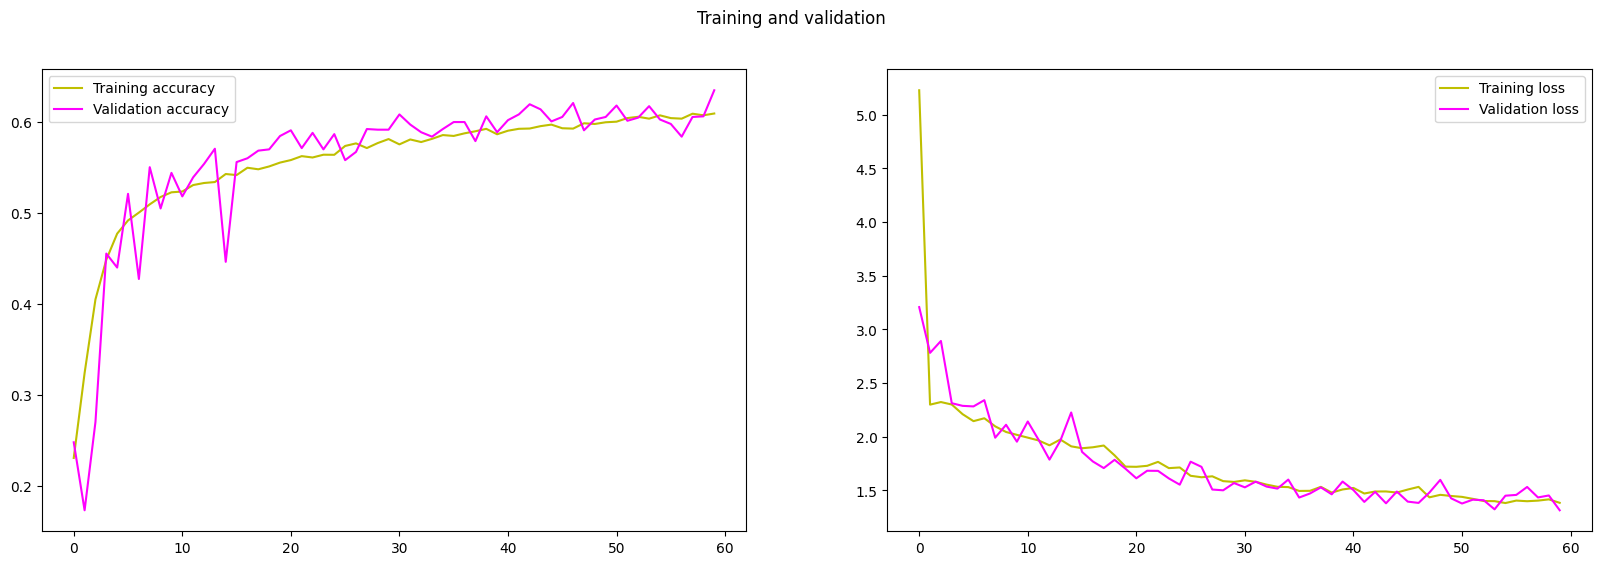

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'magenta', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'magenta', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')

In [ ]:
model.save('songPred.h5')

In [ ]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 1s 26ms/step - loss: 1.3150 - accuracy: 0.6348
final train accuracy = 64.39 , validation accuracy = 63.48


In [ ]:
# Shuffling Test Data to show diffrent classes
test_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
    )

test_generator = test_preprocessor.flow_from_directory(
    test_dir,
    class_mode="categorical",
    target_size=(img_size,img_size),
    color_mode="grayscale",
    shuffle=True,
    batch_size=64,
)

Found 7178 images belonging to 7 classes.


In [ ]:
Predictions =model.predict(test_generator)
Model_Predictions = np.argmax(Predictions, axis=1)

113/113 [==============================] - 5s 45ms/step


Text(0.5, 1.0, 'Confusion Matrix')

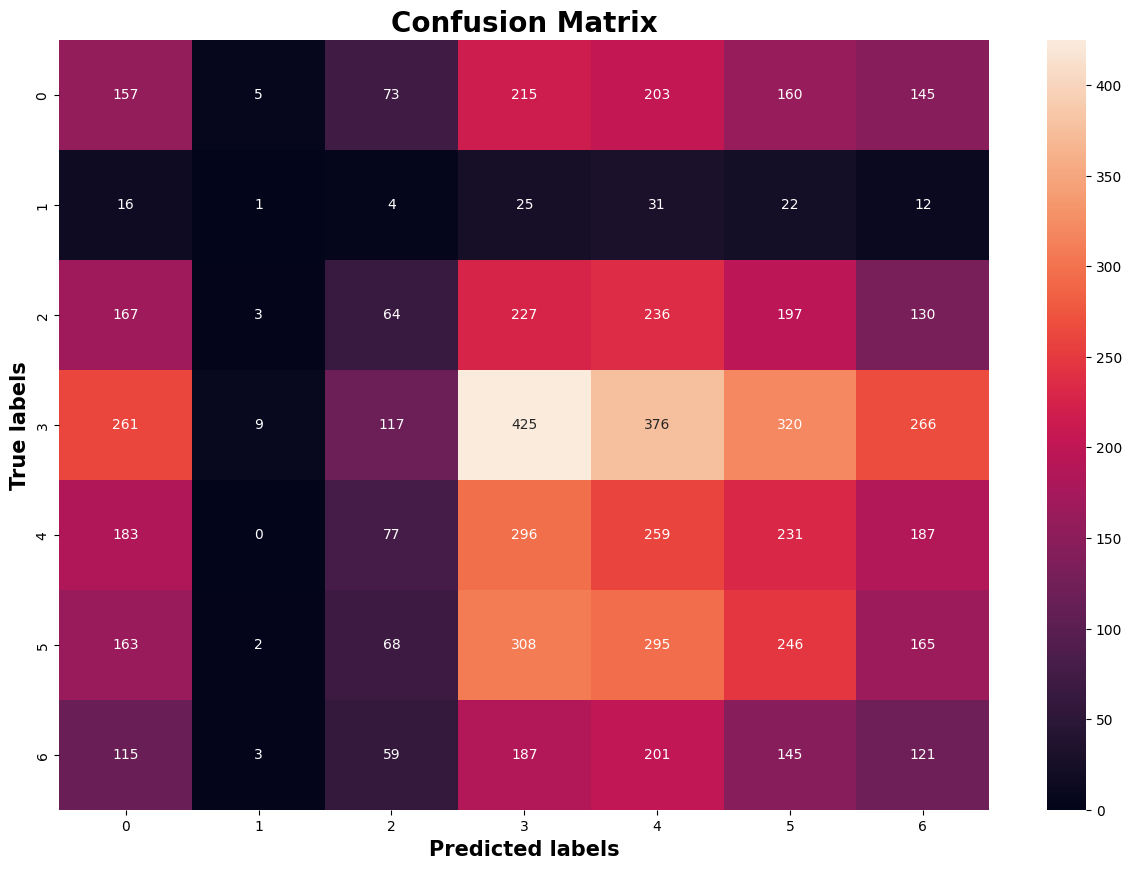

In [ ]:
fig, ax= plt.subplots(figsize=(15,10))
cm=confusion_matrix(test_generator.labels, Model_Predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

**Testing the model with sample Test Data**

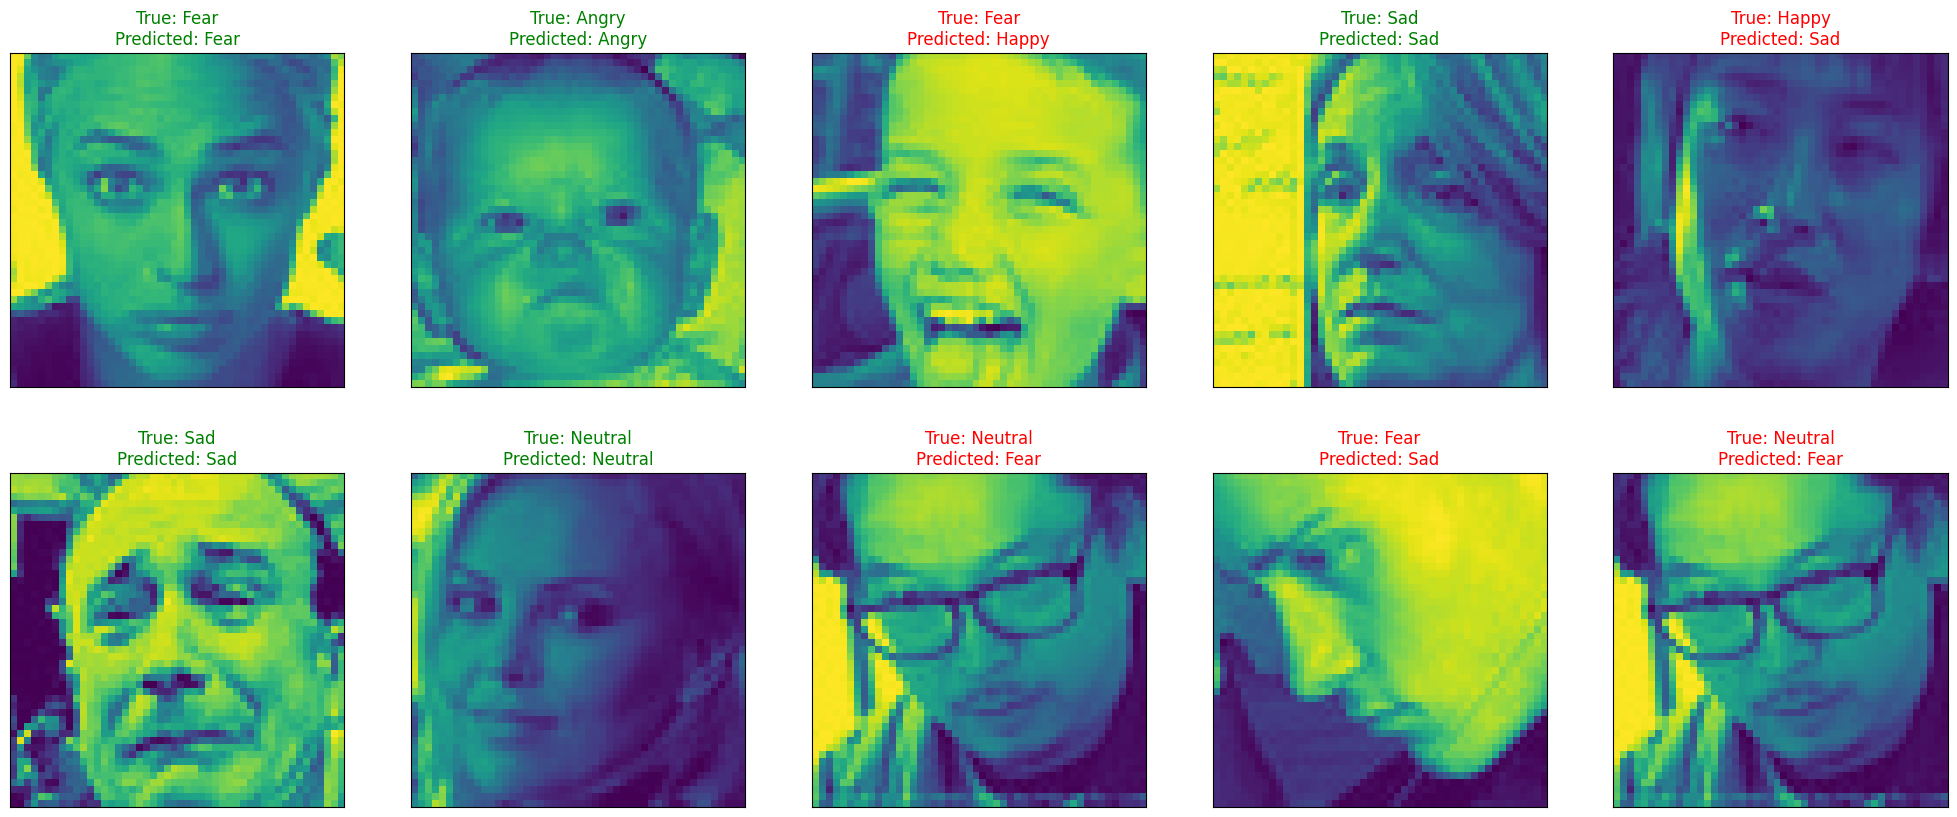

<Figure size 640x480 with 0 Axes>

In [ ]:
Emotion_Classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
Random_batch = np.random.randint(0, len(test_generator) - 1)
Random_Img_Index = np.random.randint(0, batch_size - 1 , 10)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]
    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])
    Model_Prediction = np.argmax(model.predict( tf.expand_dims(Random_Img, axis=0) , verbose=0))
    ax.imshow(Random_Img)
    if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction]:
          color = "green"
    else:
          color = "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)
plt.show()
plt.tight_layout()

**Testing the model with custom image**

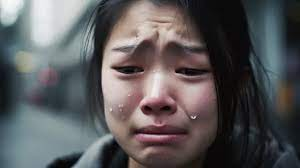

In [ ]:
image = cv2.imread("sad.jpeg")
from IPython.display import Image
Image(filename='sad.jpeg')

Prediction Rate of the given Input

In [ ]:
img = image

frame = cv2.resize(img,(48,48),interpolation=cv2.INTER_BITS2)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) / 255.0

gray = gray.reshape(1,48,48,1)

predicts = model.predict(gray)[0]
label = Emotion_Classes[predicts.argmax()]
for (i,j) in zip(range(7),Emotion_Classes):
    predictss = predicts[i]
    print("{:^10s}".format(j)+"prediction rate is equal to  {0:.2f}%".format(predictss))
print( "\n\n The final prediction of the expression is :",label)

1/1 [==============================] - 0s 108ms/step
  Angry   prediction rate is equal to  0.10%
 Disgust  prediction rate is equal to  0.00%
   Fear   prediction rate is equal to  0.15%
  Happy   prediction rate is equal to  0.01%
 Neutral  prediction rate is equal to  0.24%
   Sad    prediction rate is equal to  0.49%
 Surprise prediction rate is equal to  0.01%


 The final prediction of the expression is : Sad


In [70]:
if (label=='Angry'):
    print(f" Since you're {label} We are Now Playing a song to refresh your mind")
    audio = Audio(filename='Cool.mp3',autoplay=True)
    display(audio)

elif (label=='Disgust'):
    print(f"Since you're {label} We are Now Playing a song to make you feel normal")
    audio = Audio(filename='Boost.mp3',autoplay=True)
    display(audio)

elif (label=="Happy"):
    print(f"Since you're {label} We are Now Playing a song to boost your happiness")
    audio = Audio(filename='Happy.mp3',autoplay=True)
    display(audio)

elif (label=='Sad'):
    print(f"Since you're {label} We are Now Playing a song to boost your confidence")
    audio = Audio(filename='Motivation.mp3',autoplay=True)
    display(audio)

elif (label=='Surprise'):
    print(f"Since you're {label} We are Now Playing a song that makes you filled with joy")
    audio = Audio(filename='Surprise.mp3',autoplay=True)
    display(audio)

elif (label=='Neutral'):
    print(f"Since you're {label} We are Now Playing a song to chill")
    audio = Audio(filename='Chill.mp3',autoplay=True)
    display(audio)

Since you're Sad We are Now Playing a song to boost your confidence
